# Projections of form factors with different wedge cuts and different resolutions

In [3]:
#include "FormFactor_1D.h"
#include "FormFactor_resolution.h"
#include "FF_WS_Transforms.h"

In [4]:
double A = 197, Vo = 2.12, R = 6.38, a0 = 0.7;
double q_min = 0, q_max = 0.5, t_min = 0, t_max = 0.25;
double qy_min = 0, qy_max = 0.5, qx_prime_min = 0, qx_prime_max = 0.5;
double ty_min = 0, ty_max = 0.25, tx_prime_min = 0, tx_prime_max = 0.25, bins = 1000; 
double x_min = 0, x_max = 15, y_min = 0, y_max = 15, r_min = 0, r_max = 15;

//Parameters to mess with
double phi_min = 0, phi_max = pi/9;

// Initialize constructor
FormFactor_1D ff(A, Vo, R, a0, q_min, q_max, t_min, t_max, phi_min, phi_max);

## Compare true form factor with wedge cut form factor

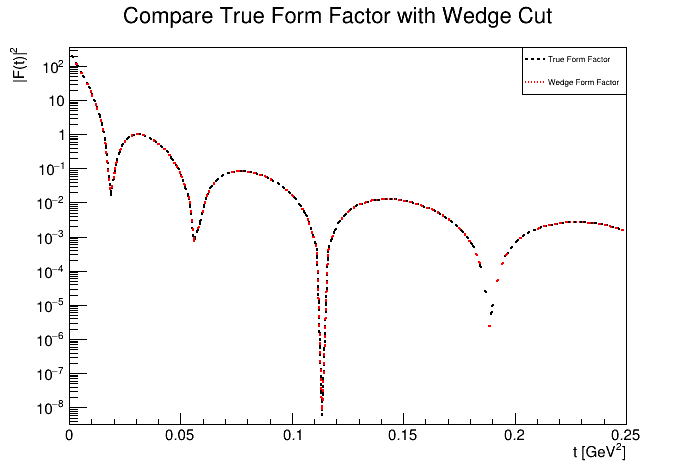

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [3]:
TF1 *trueFF = ff.getFormFactort2_1D();
// Normalize true form factor
double trueFFIntegral = trueFF->Integral(trueFF->GetXmin(), trueFF->GetXmax());
TF1 *normalizedTrueFF = new TF1("Compare True Form Factor with Wedge Cut", [trueFF, trueFFIntegral](double *x, double *par) 
{
    return trueFF->Eval(x[0]) / trueFFIntegral;
}, trueFF->GetXmin(), trueFF->GetXmax(), 0);
    normalizedTrueFF->SetLineColor(kBlack);
    normalizedTrueFF->SetLineStyle(2);
    normalizedTrueFF->GetYaxis()->SetTitle("|F(t)|^{2}");
    normalizedTrueFF->GetXaxis()->SetTitle("t [GeV^{2}]");
    normalizedTrueFF->Draw();

TF1 *wedgeFF = ff.getCutFormFactor_t2();
// Normalize wedge cut form factor
double wedgeFFIntegral = wedgeFF->Integral(wedgeFF->GetXmin(), wedgeFF->GetXmax());
TF1 *normalizedWedgeFF = new TF1("Compare True Form Factor with Wedge Cut", [wedgeFF, wedgeFFIntegral](double *x, double *par) 
{
    return wedgeFF->Eval(x[0]) / wedgeFFIntegral;
}, wedgeFF->GetXmin(), wedgeFF->GetXmax(), 0);
    normalizedWedgeFF->GetYaxis()->SetTitle("|F(t)|^{2}");
    normalizedWedgeFF->GetXaxis()->SetTitle("t [GeV^{2}]");
    normalizedWedgeFF->SetLineColor(kRed);
    normalizedWedgeFF->SetLineStyle(3);
    normalizedWedgeFF->Draw("same");

TLegend *legend = new TLegend(0.75, 0.8, 0.9, 0.9);
    legend->AddEntry(normalizedTrueFF, "True Form Factor", "l");
    legend->AddEntry(normalizedWedgeFF, "Wedge Form Factor", "l");
    legend->Draw();
gPad->Update();
gPad->SetLogy(1);

## Compare the cut form factors with different resolutions added

In [5]:
// Initialize constructors with different sigma values
double sigma5 = 0.005;
FormFactor_resolution ff_5(A,Vo,R,a0,q_min,q_max,t_min,t_max,phi_min,phi_max,qy_min,qy_max,qx_prime_min,qx_prime_max,ty_min,ty_max,tx_prime_min,tx_prime_max,bins,bins,bins,bins,bins,x_min,x_max,y_min,y_max,r_min,r_max,sigma5);
double sigma50 = .05;
FormFactor_resolution ff_50(A,Vo,R,a0,q_min,q_max,t_min,t_max,phi_min,phi_max,qy_min,qy_max,qx_prime_min,qx_prime_max,ty_min,ty_max,tx_prime_min,tx_prime_max,bins,bins,bins,bins,bins,x_min,x_max,y_min,y_max,r_min,r_max,sigma50);
double sigma100 = 0.1;
FormFactor_resolution ff_100(A,Vo,R,a0,q_min,q_max,t_min,t_max,phi_min,phi_max,qy_min,qy_max,qx_prime_min,qx_prime_max,ty_min,ty_max,tx_prime_min,tx_prime_max,bins,bins,bins,bins,bins,x_min,x_max,y_min,y_max,r_min,r_max,sigma100);
double sigma150 = 0.15;
FormFactor_resolution ff_150(A,Vo,R,a0,q_min,q_max,t_min,t_max,phi_min,phi_max,qy_min,qy_max,qx_prime_min,qx_prime_max,ty_min,ty_max,tx_prime_min,tx_prime_max,bins,bins,bins,bins,bins,x_min,x_max,y_min,y_max,r_min,r_max,sigma150);


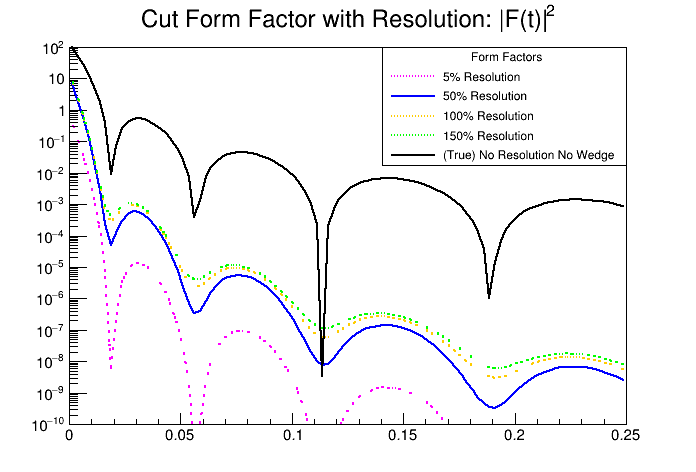

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1


In [6]:
TF1 *res_5percent= ff_5.getTest();
    res_5percent->SetLineColor(kMagenta); 
    res_5percent->SetLineStyle(3);    
    res_5percent->GetYaxis()->SetRangeUser(1e-10,1e2);
    res_5percent->Draw();
TF1 *res_50percent= ff_50.getTest();
    res_50percent->SetLineColor(kBlue);  
    res_50percent->SetLineStyle(1);    
    res_50percent->GetYaxis()->SetRangeUser(1e-10,1e2);
    res_50percent->Draw("same");
TF1 *res_100percent= ff_100.getTest();
    res_100percent->SetLineColor(kOrange);  
    res_100percent->SetLineStyle(3);  
    res_100percent->GetYaxis()->SetRangeUser(1e-10,1e2);
    res_100percent->Draw("same");
TF1 *res_150percent= ff_150.getTest();
    res_150percent->SetLineColor(kGreen);  
    res_150percent->SetLineStyle(3);    
    res_150percent->GetYaxis()->SetRangeUser(1e-10,1e2);
    res_150percent->Draw("same");
/*
TF1 *ff_t2_wedge = ff2.getCutFormFactor_t2();
    ff_t2_wedge->SetLineColor(kMagenta); 
    ff_t2_wedge->SetLineStyle(3);    
    ff_t2_wedge->GetYaxis()->SetRangeUser(1e-10,1e2);
    ff_t2_wedge->Draw("same");
*/
TF1 *ff_t2 = ff.getFormFactort2_1D();
    ff_t2->SetLineColor(kBlack); 
    ff_t2->GetYaxis()->SetRangeUser(1e-10,1e2);
    ff_t2->Draw("same");
TLegend *legend = new TLegend(0.55, 0.65, 0.9, 0.9);
    legend->SetHeader("Form Factors", "C"); 
    legend->AddEntry(res_5percent, "5% Resolution", "l");
    legend->AddEntry(res_50percent, "50% Resolution", "l");
    legend->AddEntry(res_100percent, "100% Resolution", "l");
    legend->AddEntry(res_150percent, "150% Resolution", "l");
    //legend->AddEntry(ff_t2_wedge, "No Resolution with Wedge", "l");
    legend->AddEntry(ff_t2, "(True) No Resolution No Wedge", "l");
    legend->Draw();

c1->SetLogy();
c1->Update();

## Test the transformations of the wedge cuts with different resolutions

In [7]:
// Initialize transformation constructor
double q_min2 = 0, q_max2 = 5
FF_WS_Transforms transformer(A, Vo, R, a0, q_min2, q_max2, t_min, t_max, phi_min, phi_max, bins, r_min, r_max);

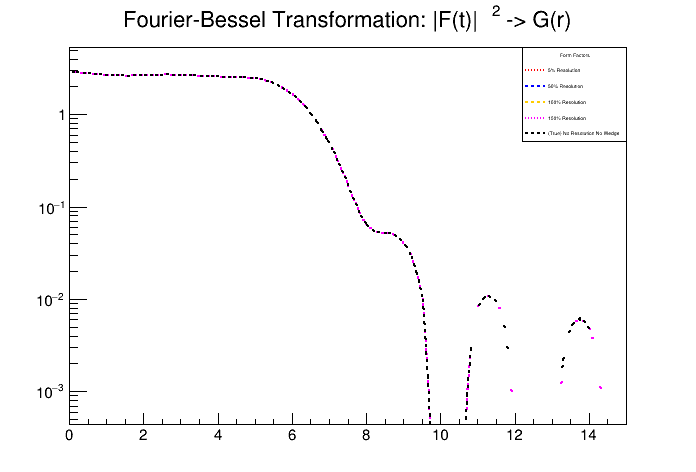

In [9]:
TF1 *transformed_5 = transformer.transformTF1(res_5percent, r_min, r_max,q_min,q_max);
    transformed_5->SetLineColor(kRed);  
    transformed_5->SetLineStyle(3);    
    //transformed_5->GetYaxis()->SetRangeUser(1e-10,1e2);
    transformed_5->Draw();
TF1 *transformed_50 = transformer.transformTF1(res_50percent, r_min, r_max,q_min,q_max);
    transformed_50->SetLineColor(kBlue);  
    transformed_50->SetLineStyle(2);    
    //transformed_50->GetYaxis()->SetRangeUser(1e-10,1e2);
    transformed_50->Draw("same");
TF1 *transformed_100 = transformer.transformTF1(res_100percent, r_min, r_max,q_min,q_max);
    transformed_100->SetLineColor(kOrange);  
    transformed_100->SetLineStyle(2);    
    //transformed_100->GetYaxis()->SetRangeUser(1e-10,1e2);
    transformed_100->Draw("same");
TF1 *transformed_150 = transformer.transformTF1(res_150percent, r_min, r_max,q_min,q_max);
    transformed_150->SetLineColor(kMagenta);  
    transformed_150->SetLineStyle(3);    
    //transformed_150->GetYaxis()->SetRangeUser(1e-10,1e2);
    transformed_150->Draw("same");
TF1 *transformed_true_ff = transformer.transformTF1(ff_t2, r_min, r_max,q_min,q_max);
    transformed_true_ff->SetLineColor(kBlack);     
    transformed_true_ff->SetLineStyle(2); 
    //transformed_true_ff->GetYaxis()->SetRangeUser(1e-10,1e2);
    transformed_true_ff->Draw("same");
TLegend *legend = new TLegend(0.75, 0.7, 0.9, 0.9);
    legend->SetHeader("Form Factors", "C"); 
    legend->AddEntry(transformed_5, "5% Resolution", "l");
    legend->AddEntry(transformed_50, "50% Resolution", "l");
    legend->AddEntry(transformed_100, "100% Resolution", "l");
    legend->AddEntry(transformed_150, "150% Resolution", "l");
    legend->AddEntry(transformed_true_ff, "(True) No Resolution No Wedge", "l");
    legend->Draw();
c1->Update();